**Author:** Beatrice Occhiena s314971. See [`LICENSE`](https://github.com/beatrice-occhiena/Computational_intelligence/blob/main/LICENSE) for details.
- institutional email: `S314971@studenti.polito.it`
- personal email: `beatrice.occhiena@live.it`
- github repository: [https://github.com/beatrice-occhiena/Computational_intelligence.git](https://github.com/beatrice-occhiena/Computational_intelligence.git)

**Resources:** These notes are the result of additional research and analysis of the lecture material presented by Professor Giovanni Squillero for the Computational Intelligence course during the academic year 2023-2024 @ Politecnico di Torino. They are intended to be my attempt to make a personal contribution and to rework the topics covered in the following resources.
- [https://github.com/squillero/computational-intelligence](https://github.com/squillero/computational-intelligence)
- Stuart Russel, Peter Norvig, *Artificial Intelligence: A Modern Approach* [3th edition]

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import random

## Landscape Function

### Himmelblau's function
In mathematical optimization, Himmelblau's function is a multi-modal function 
used to test the performance of optimization algorithms.

$$f(x,y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2$$

- `Input domain`: this function is usually evaluated on the square $x,y \in [-4,4]$
- `Local maximum`
  - $f(-0.270845, -0.923039) = 181.617$
- `Global minima`
  - $f(3.0,2.0) = 0.0$
  - $f(-2.805118,3.131312) = 0.0$
  - $f(-3.779310,-3.283186) = 0.0$
  - $f(3.584428,-1.848126) = 0.0$

Since in computer science we usually want to maximize our objective function, I will use the negative of Himmelblau's function for its landscape representation.

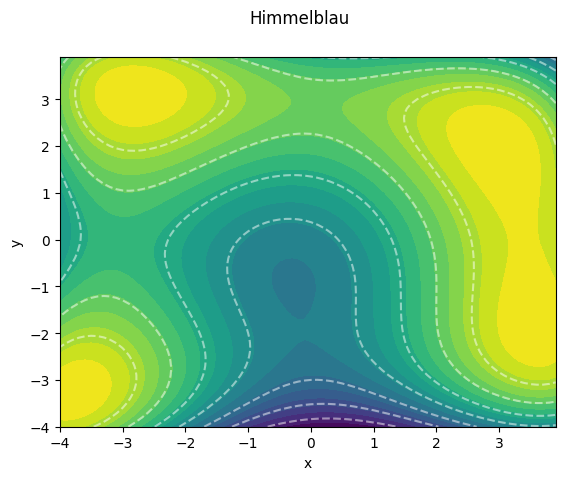

In [212]:
def himmelblau(x, y):
    return -((x**2 + y - 11)**2 + (x + y**2 - 7)**2)

def visulize_himmelblau():
    x = np.arange(-4, 4, 0.1)
    y = np.arange(-4, 4, 0.1)
    X, Y = np.meshgrid(x, y)
    Z = -((X**2 + Y - 11)**2 + (X + Y**2 - 7)**2)

    fig = plt.figure('himmelblau')
    fig.suptitle('Himmelblau')
    ax = fig.gca()
    ax.contourf(X, Y, Z, cmap=plt.cm.viridis, levels=np.linspace(np.min(Z), 0, 20))
    ax.contour(X, Y, Z, colors='white', alpha=0.5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()

visulize_himmelblau()

In [219]:
def visualize_himmelblau(population=None, parents=None, best_individual=None):
    x = np.arange(-4.5, 4.5, 0.1)
    y = np.arange(-4.5, 4.5, 0.1)
    X, Y = np.meshgrid(x, y)
    Z = -((X**2 + Y - 11)**2 + (X + Y**2 - 7)**2)

    fig = plt.figure('himmelblau')
    fig.suptitle('Himmelblau')
    ax = fig.gca()
    ax.contourf(X, Y, Z, cmap=plt.cm.viridis, levels=np.linspace(np.min(Z), 5, 30))
    ax.contour(X, Y, Z, colors='white', alpha=0.5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    if population is not None:
        population_x = [ind[0] for ind in population]
        population_y = [ind[1] for ind in population]
        ax.scatter(population_x, population_y, color='red', marker='o', label='Population', s=20)
    
    if parents is not None:
        parents_x = [ind[0] for ind in parents]
        parents_y = [ind[1] for ind in parents]
        ax.scatter(parents_x, parents_y, color='black', marker='o', label='Parents', s=20)
    
    if best_individual is not None:
        # use a star marker to denote the best individual
        ax.scatter(best_individual[0], best_individual[1], color='white', marker='*', label='Best', s=100)

    plt.legend()
    plt.show()

## Genetic Operators

### 🦠 Mutation - "Asexual breeding"
The **mutation operator** can be described as a stochastic process that makes small, random changes to one or more genes of an individual. These changes are introduced to create genetic diversity within a population of candidate solutions.

Objectives:
- Manteinance of `diversity` in the population
- Avoid `premature convergence` to a local optimum
- Favor `exploration` of the search space

Parameters:
- `mutation rate`: probability of mutation for each gene
- `mutation strength`: how much the gene is changed
- `mutation type`: type of mutation (e.g. uniform, gaussian, etc.)

Adjusting these parameters can influence the trade-off between exploration and exploitation in the search.

Since in this simplified example we only have two genes, representing the $x$ and $y$ coordinates, I've also defined a `pervasive mutation` operator that allows to change both genes at the same time.

In [177]:
def uniform_mutation(individual, p=0.1, dim=0.5):
    """
      Uniform mutation.
      - p: probability of mutating a gene
      - dim: the range of the mutation
    """
    # Create child
    child = np.empty_like(individual)
    for i in range(len(individual)):
        if random.random() > p:
            child[i] = individual[i]
        else:
            child[i] = random.uniform(-dim, dim)
    return child

def pervasive_uniform_mutation(individual, p=0.1, dim=0.5):
    """
        Uniform mutation.
        - p: probability of mutating ALL genes
    """
    
    # Create child
    child = np.empty_like(individual)
    if random.random() < p:
        for i in range(len(individual)):
            child[i] = random.uniform(-dim, dim)
    else:
        child = individual
    return child


def pervasive_gaussian_mutation(individual, p=0.1, mu=0, sigma=1):
    """
      Gaussian mutation.
      - p: probability of mutating ALL genes
      - mu: mean of the Gaussian distribution
      - sigma: standard deviation of the Gaussian distribution - the mutation strength
    """
    # Create child
    child = np.empty_like(individual)
    if random.random() < p:
        for i in range(len(individual)):
            child[i] = individual[i] + random.gauss(mu, sigma)
    else:
        child = individual
    return child

def gaussian_mutation(individual, p=0.1, mu=0, sigma=1):
    """
      Gaussian mutation.
      - p: probability of mutating a gene
      - mu: mean of the Gaussian distribution
      - sigma: standard deviation of the Gaussian distribution - the mutation strength
    """
    # Create child
    child = np.empty_like(individual)
    for i in range(len(individual)):
        if random.random() > p:
            child[i] = individual[i]
        else:
            child[i] = individual[i] + random.gauss(mu, sigma)
    return child


#### Adaptive Mutation
The mutation rate can be adjusted during the search to improve the performance of the algorithm. 

1. `Self-adaptive mutation`: the mutation rate is encoded in the chromosome and evolves during the search.

For example, we can start with a high mutation rate to explore the search space and then decrease it to exploit the best solutions found so far.
- 

### 👨🏽‍👩🏻‍👧🏻‍👦🏽 Crossover - "sexual breeding"
The **crossover operator** is a fundamental genetic operator used in genetic algorithms (GAs) and other evolutionary algorithms. It plays a key role in generating new candidate solutions by combining information from two or more parent solutions to create one or more offspring solutions. Crossover simulates the genetic recombination process, which is inspired by biological reproduction.

Objectives:
- `Recombination` of genetic material
- Favor `exploitation` by preserving good genes

Parameters:
- `crossover rate`: probability of crossover for each gene
- `crossover type`: type of crossover (e.g. one-point, two-point, uniform, etc.)

Since in this simplified example we only have two genes, representing the $x$ and $y$ coordinates, I will use a static `one-point crossover` operator that swaps the genes of the two parents and an `arithmetic crossover` operator that creates a new individual by taking the average of the two parents.

In [187]:
def one_point_xover(ind1, ind2, p=1.0):
    """
      One-point crossover.
      - p: probability of crossover
    """
    # Create children
    child1, child2 = np.empty_like(ind1), np.empty_like(ind2)
    if random.random() < p:
        # Select crossover point
        #cxpoint = random.randint(1, len(ind1)-1)
        cxpoint = 1
        # Create children
        child1 = np.hstack((ind1[:cxpoint], ind2[cxpoint:]))
        child2 = np.hstack((ind2[:cxpoint], ind1[cxpoint:]))
    else:
        child1, child2 = ind1, ind2
    return child1, child2

def average_xover(parent1, parent2, p=1.0):
    """
      Average crossover.
      - Only suitable for real-valued representations (!)
      - p: probability of crossover
    """
    # Create children
    child1, child2 = np.empty_like(parent1), np.empty_like(parent2)
    if random.random() < p:
        for i in range(len(parent1)):
            child1[i] = (parent1[i] + parent2[i]) / 2
            child2[i] = (parent1[i] + parent2[i]) / 2
    else:
        child1, child2 = parent1, parent2
    return child1, child2

### 🏇🏻 Selection
The **selection operator** is a genetic operator used in genetic algorithms (GAs) to select potentially useful solutions for recombination. Selection simulates the natural selection process, where fitter individuals are more likely to be selected for reproduction in order to produce fitter offspring.

Objectives:
- Introduction of `deteminism` in the search
- `Fitness-based` selection of the best individuals
- Favor `exploitation` by preserving good genes

Parameters:
- `selection pressure`: how much the best individuals are favored
- `selection type`
  - `fitness-proportionate selection`: the probability of selecting an individual is proportional to its fitness
  - `tournament selection`: the best individual is selected from a random subset of the population


In [204]:
def tournament_selection(population, fitness_values, tournament_size):
    """
      Tournament selection.
      - tournament_size: the number of individuals participating in the tournament
        - if tournament_size = 1 -> random selection
        - if tournament_size = pop_size -> elitism (best individual is selected)
    """
    winner_idx = random.randint(0, len(population)-1)
    for i in range(tournament_size-1):
        idx = random.randint(0, len(population)-1)
        if fitness_values[idx] > fitness_values[winner_idx]:
            winner_idx = idx
    return population[winner_idx]

  

def roulette_wheel_selection(population, fitness_values):
    """
      Roulette wheel selection.
    """
    # Calculate sum of fitness values
    sum_fitness = np.sum(fitness_values)
    # Calculate selection probabilities
    selection_probs = fitness_values / sum_fitness
    # Calculate cumulative probabilities
    cum_probs = np.cumsum(selection_probs)
    # Generate random number
    r = random.random()
    # Select individual whose cumulative probability is greater than r
    for i in range(len(cum_probs)):
        if cum_probs[i] > r:
            return population[i]

## Genetic Algorithm

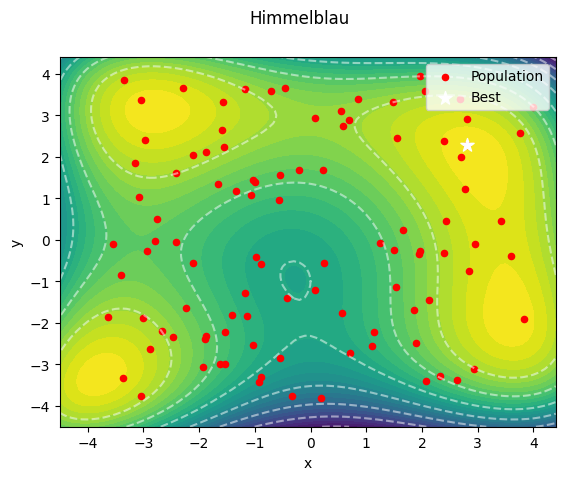

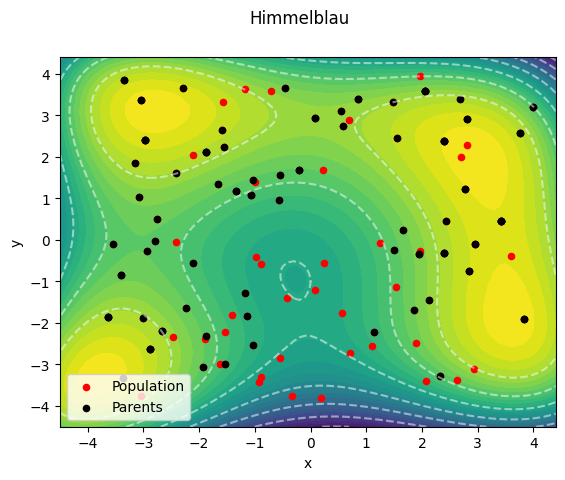

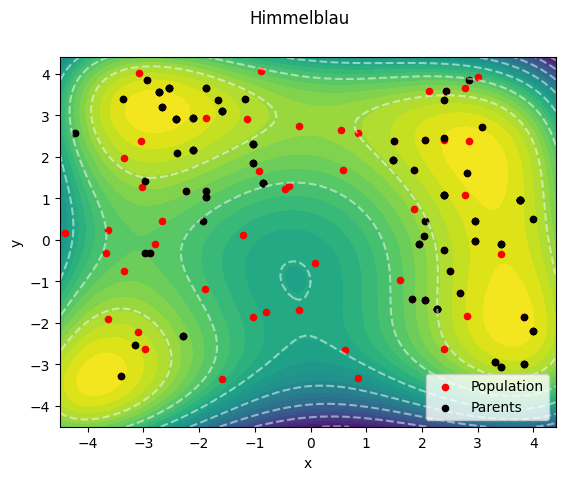

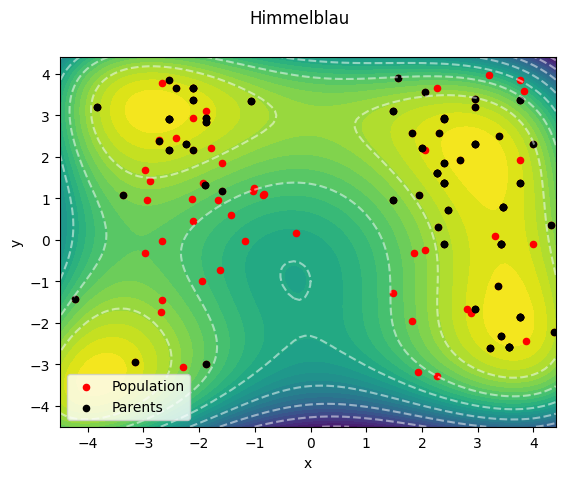

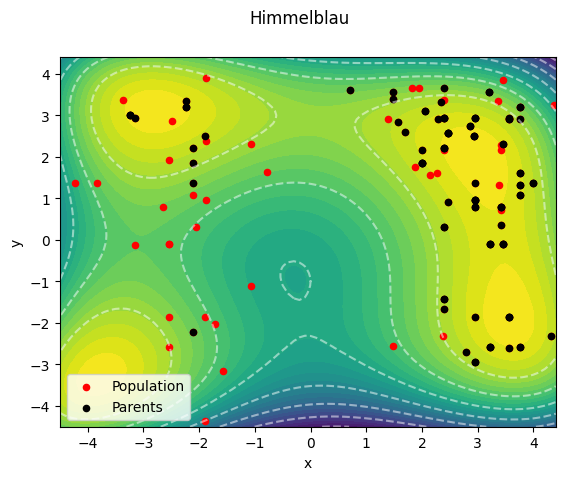

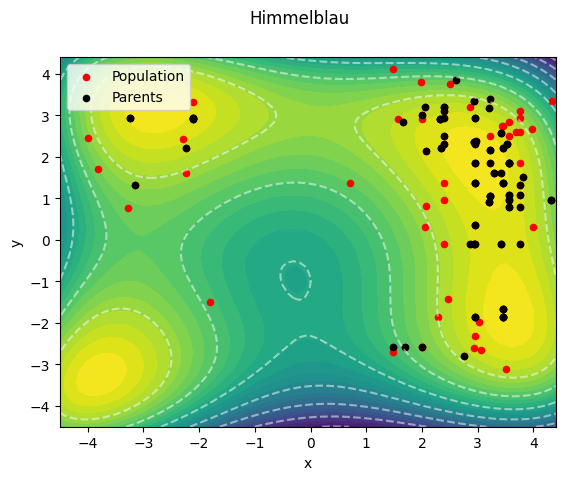

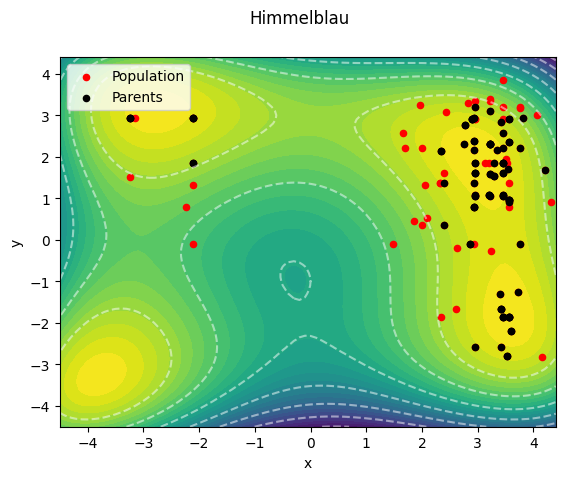

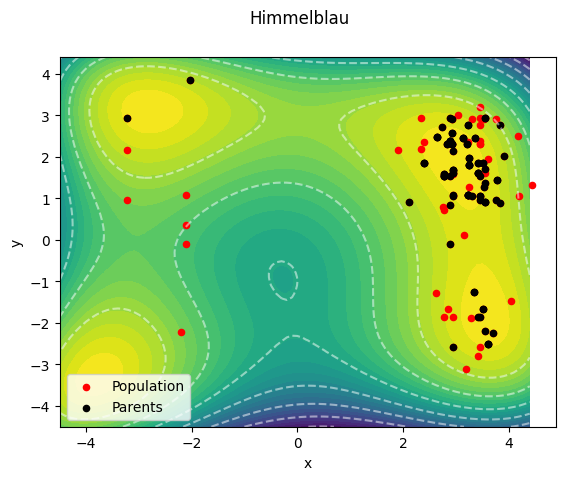

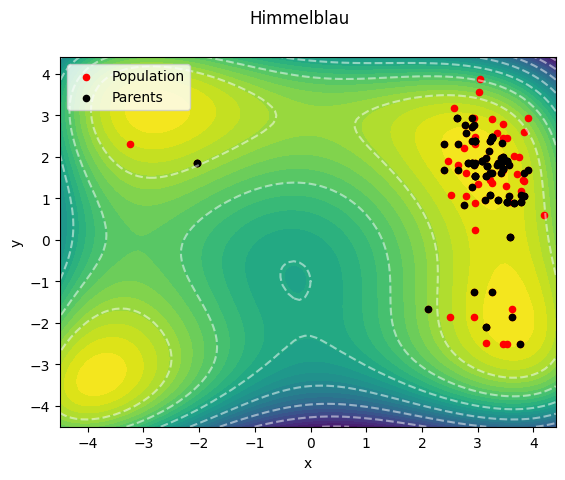

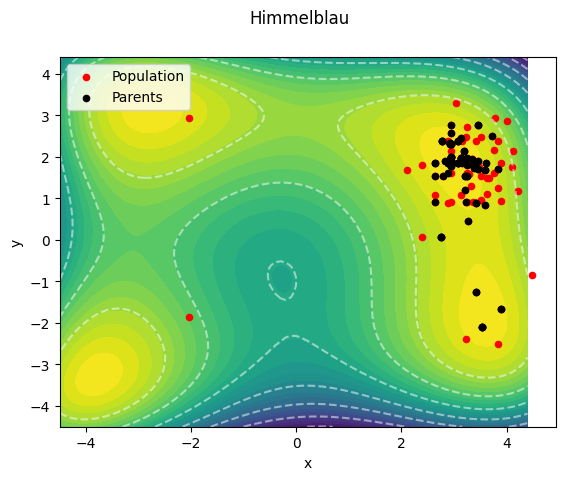

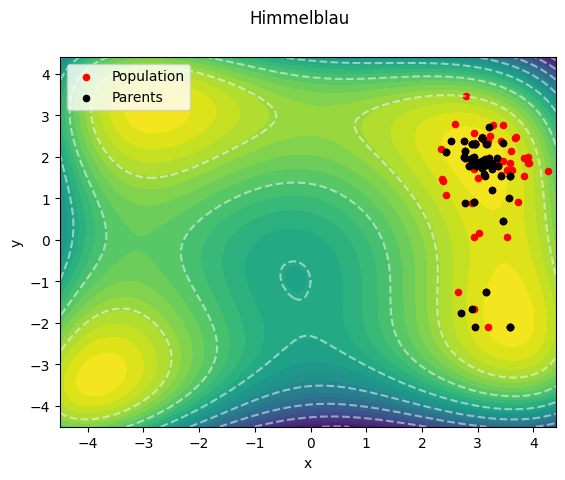

Best solution: [3.0681734  1.96887807] Value: -0.14941997890702785


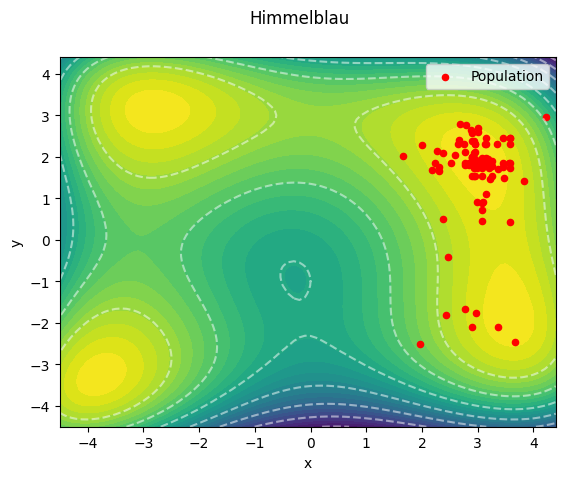

In [220]:


def initialize_population(population_size):
    return [(random.uniform(-4, 4), random.uniform(-4, 4)) for _ in range(population_size)]

def evaluate_population(population):
    return [himmelblau(x, y) for x, y in population]

def select_mating_pool(population, fitness_values, pool_size):
    return random.choices(population, weights=[1 / (f + 1e-6) for f in fitness_values], k=pool_size)

def crossover(parent1, parent2):
    x1, y1 = parent1
    x2, y2 = parent2
    return (x1, y2)



population_size = 100
mutation_rate = 0.3
mutation_strength = 0.5 # sigma in Gaussian mutation, dim in uniform mutation
generations = 10
tournament_size = 2

# SELF-ADAPTIVE MUTATION
initial_mutation_strength = 0.5 # sigma in Gaussian mutation, dim in uniform mutation
success_rate_threshold = 1/5 # One-fifth success rule

population = initialize_population(population_size)

# Save best individual - to not lose it during evolution
best_individual = max(population, key=lambda ind: himmelblau(ind[0], ind[1]))
best_fitness = himmelblau(best_individual[0], best_individual[1])

# Visualize initial condition
visualize_himmelblau(population, best_individual=best_individual)

for generation in range(generations):
    
    fitness_values = evaluate_population(population)
    new_population = []
    parents = []
    for _ in range(population_size // 2):

        # Parents selection
        parent1 = tournament_selection(population, fitness_values, tournament_size)
        parent2 = tournament_selection(population, fitness_values, tournament_size)
        parents.extend([parent1, parent2])

        # Children generation
        child1, child2 = one_point_xover(parent1, parent2)
        child1 = pervasive_gaussian_mutation(child1, p=mutation_rate, sigma=0.5)
        child2 = pervasive_gaussian_mutation(child2, p=mutation_rate, sigma=0.5)
        new_population.extend([child1, child2])

    visualize_himmelblau(population, parents, best_individual)
    population = new_population

best_solution = max(population, key=lambda ind: himmelblau(ind[0], ind[1]))
print("Best solution:", best_solution, "Value:", himmelblau(best_solution[0], best_solution[1]))
visualize_himmelblau(population)
